# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [5]:
# Get the datasets
!curl.exe --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat
!curl.exe --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11244  100 11244    0     0  36467      0 --:--:-- --:--:-- --:--:-- 36865
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 95  2844   95  2715    0     0  21432      0 --:--:-- --:--:-- --:--:-- 21720
100  2844  100  2844    0     0  22384      0 --:--:-- --:--:-- --:--:-- 22752


In [6]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [7]:
#### A13 is label not data


In [46]:
import math
import itertools
import re

 
# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    dot_product_value = sum(x * y for x, y in zip(array1, array2))
    return dot_product_value 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    sigmoid_value = 1/1+ (math.pow(math.e,-x))
    return sigmoid_value

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    dot_product_op =  dot_product(weight, instance)
    output_value = sigmoid(dot_product_op)
    return output_value

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    out = output(weights, instance)
    label = 1 if out >= 0.5 else 0
    return label


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    #print(weights)
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    #print(correct)
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #Creating a weights list with zeros equal to number of coordinates (subtracting one from the length as the last one is the label)
    #Initializing the weights to zero
    
    weights = [0] * (len(instances[0])-1)

    for x in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #"in_value": Compute input value. Calculates input to the perceptron which is dot product of weights and coordinate values for the particular instance. Initially the weights will be zero as initialized.
            #"output" Compute output value. Calculates output of perceptron for particular instance using activation function which is applying sigmoid function to the dot product of weights and coordinates
            #"error": Compute error. Calculates the difference between actual value (label in A13 here) and predicted value of perceptron(output here)
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            #Updating weights
            #In the below snippet, the weights are being updated based on learning rate, error, actual value of instance and the predicted output value. It is done to minimise the error.
            #Fitting parameters
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [36]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
#print(len(weights))
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

[-0.8546282160630142, 0.318099655580063, 0.36435300836904155, 0.36820048603468675, 0.35639079343319496, 0.37934490553596234, 0.35745501510379474, 0.41037032801795814, 0.3396954181730829, 0.3523941476605033, 0.38326771144979277, 0.29512508697886564, 0.37546692801221077, 0.8546282160630142]
32
#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 32.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
Answer: In order to train the percdeptron we need the error i.e, difference between the predicted value and actual value. "Output" in the first code snippet gives the exact predicted value after using the activation function where as in the second code snippet we are predicting the label using the output of the activation function. In order to minimise the error and increase the accuracy we need to train the perceptron using output of activation functions like sigmoid, ReLU rather than applying step function to directly predict the output with the initialised weights. 




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [37]:
len(instances_tr[0])

15

In [38]:
import pandas
test = pandas.DataFrame(instances_tr)

In [39]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1,1,1,0,0,0,0,0,0,1,1,0,0,1,0
1,-1,0,0,1,1,0,1,1,0,0,0,0,0,1,0
2,-1,0,1,0,1,1,0,1,0,1,1,1,0,1,1
3,-1,0,0,1,0,0,1,0,1,0,1,1,1,1,0
4,-1,0,1,0,0,0,0,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1,1,1,0,0,0,0,1,0,0,0,0,1,1,0
396,-1,0,0,0,1,1,0,1,0,0,1,0,0,1,0
397,-1,1,1,0,1,0,0,0,0,0,1,1,0,1,1
398,-1,1,1,1,1,0,1,0,1,1,1,0,1,1,1


In [40]:
test.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1,1,1,0,0,0,0,0,0,1,1,0,0,1,0
1,-1,0,0,1,1,0,1,1,0,0,0,0,0,1,0
2,-1,0,1,0,1,1,0,1,0,1,1,1,0,1,1
3,-1,0,0,1,0,0,1,0,1,0,1,1,1,1,0
4,-1,0,1,0,0,0,0,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1,1,1,0,0,0,0,1,0,0,0,0,1,1,0
396,-1,0,0,0,1,1,0,1,0,0,1,0,0,1,0
397,-1,1,1,0,1,0,0,0,0,0,1,1,0,1,1
398,-1,1,1,1,1,0,1,0,1,1,1,0,1,1,1


In [41]:
len(instances_tr)

400

In [42]:
len(instances_te)

100

In [49]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      #print(size)
      pre_instances = instances_tr[0:size]
      #print(len(pre_instances))
      weights = train_perceptron(pre_instances, lr, epochs)
      #print((weights))
      accuracy = get_accuracy(weights, instances_te)
      #print(accuracy)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 32.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 32.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 32.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 32.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 32.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 32.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 32.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 32.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 32.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 32.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 32.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 32.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



In [57]:
#Answer A supporting graph:
import pandas as pd
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate
training_size = []
accuracies = []
for lr in lr_array:
  for tr_size in tr_percent:
    
    for epochs in num_epochs:
      training_size.append(tr_size)
      size =  round(len(instances_tr)*tr_size/100)
      #print(size)
      pre_instances = instances_tr[0:size]
      #print(len(pre_instances))
      weights = train_perceptron(pre_instances, lr, epochs)
      #print((weights))
      accuracy = get_accuracy(weights, instances_te)
      accuracies.append(accuracy)  

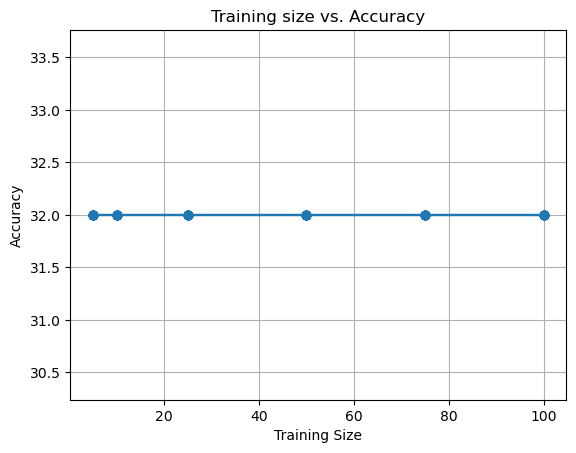

In [58]:
import matplotlib.pyplot as plt

# Plotting
plt.plot(training_size, accuracies, marker='o', linestyle='-')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Training size vs. Accuracy')
plt.grid(True)
plt.show()

Answer A: This is not always the case. Taking higher amounts of data from training dataset for the training might not always lead to best possible accuracy if the overfitting occurs. Some datasets might not be of good quality they might have lot of noise, using the subsets which represent the distribution of whole dataset might achieve better results with more computational efficiency. Cross validation techniques might help us achieve better results without using whole data. Saying so, sometimes using the whole dataset might lead to better accuracy so that the model might learn better if the distribution of the test data is represented better by the whole training dataset. From the above graph we can see that training size hasn't effected the accuracy, with the data being very sparse and simple. 


Answer B: Even though the second one uses more training data, looking at the training data we can say that the data is simple and faster learning rate can help to converge to the solution better and faster. With faster learning rate the model might have skipped the local minima and achieved better accuracy with global minima.


Answer C: There is a possibility of achieving higher accuracy with additional hyperparameters in model configuration techniques. We can use Grid search CV, Random search CV to get the best hyper parameters which yield high accuracy. We can also use different optimisation algorithms like RMS prop, ensemble methods like bagging boosting in order to achieve higher accuracy. We may also explore different models in order to achieve it. However, we should check the complexity of the model, do feature engineering to extract meaningful features in order to improve the model accuracy.

Answer D: Training for more epochs keeping all other hyper parameters constant might not always be beneficial as there is risk of over fitting in the model. The computational costs also increase if the data is huge and the performance doesn't improve with increase in epochs. At the same time, it might also reduce underfitting in some models and works well with huge datasets as they require more epoch to reach the optimal solution. 